In [1]:
import sys
import importlib
sys.path.append("/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/")
import python.utils as ut

import os
import numpy as np
import arviz as az
from numpy.polynomial.legendre import legvander
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import json
import glob
from scipy.stats import norm, cauchy, mode, t
from cmdstanpy import from_csv
import seaborn as sns
from tqdm import tqdm
import corner

plt.style.use('seaborn-v0_8')

In [19]:
# Load in initial data array
bg_data_path = "/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/data/json/legendre_bg_only.json"
hmm_data_path = "/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/data/json/hmm_dict.json"

with open(bg_data_path, "r") as f:
    bg_dict = json.load(f)
    
with open(hmm_data_path, "r") as f:
    hmm_dict = json.load(f)

In [3]:
# Load both sets of outputs
bg_outputs = glob.glob("../stan/stan_out/legendre_bg_only-20251027151757_*.csv")
hmm_outputs = glob.glob("../stan/stan_out/hmm_on_residuals-20251027144924_*.csv")

bg_fit = from_csv(bg_outputs)
hmm_fit = from_csv(hmm_outputs)

In [4]:
print(bg_fit.diagnose())

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.



In [5]:
print(hmm_fit.diagnose())

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.



## Inspect Legendre Polynomial BG Fitting

 10%|▉         | 32/335 [00:06<00:57,  5.29it/s]


KeyboardInterrupt: 

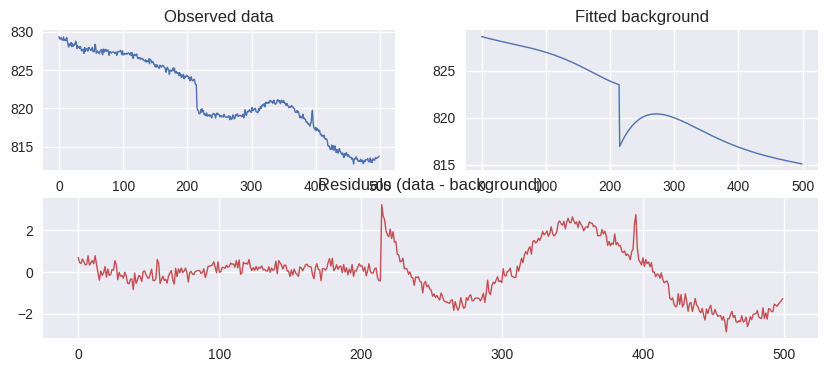

In [32]:
c = 0
for i in tqdm(range(0, len(bg_dict['y']), 100)):
    start = i
    end = i+500

    data = np.asarray(bg_dict['y'])[start:end]
    bg = bg_fit.stan_variable("mu").mean(axis=0)[start:end]
    res = data - bg

    fig = plt.figure(figsize=(10, 4))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

    # Top-left: data
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(data, linewidth=1)
    ax1.set_title("Observed data")

    # Top-right: background
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(bg, linewidth=1)
    ax2.set_title("Fitted background")

    # Bottom: residuals (full width)
    ax3 = fig.add_subplot(gs[1, :])
    ax3.plot(res, linewidth=1, color=sns.color_palette()[2])
    ax3.set_title("Residuals (data - background)")

    plt.tight_layout()
    plt.savefig(f"../data_private/intermediate_figures/compare_{c:03d}.png", dpi=300, bbox_inches='tight')
    plt.clf()
    plt.close()
#     plt.show()

    c += 1

## Inspect HMM

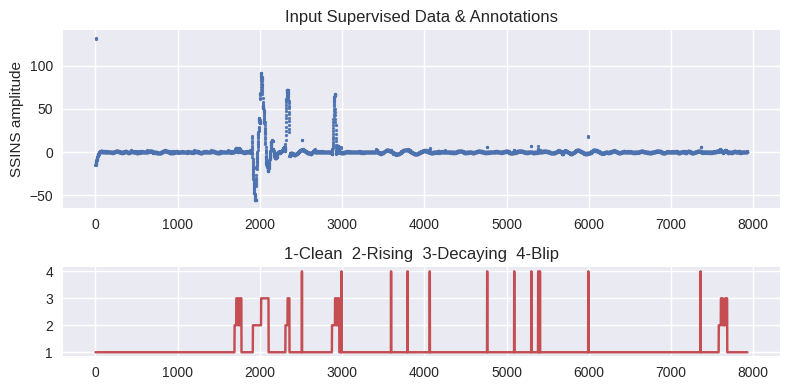

In [20]:
ut.plot_supervised_inputs(hmm_dict, pointing='p0')

In [27]:
# importlib.reload(ut)

# for i in range(50):
#     ut.plot_data_vs_pred(hmm_dict, hmm_fit, pointing='p0', 
#             cut_idx=i,
#             save_path=None,
#     )

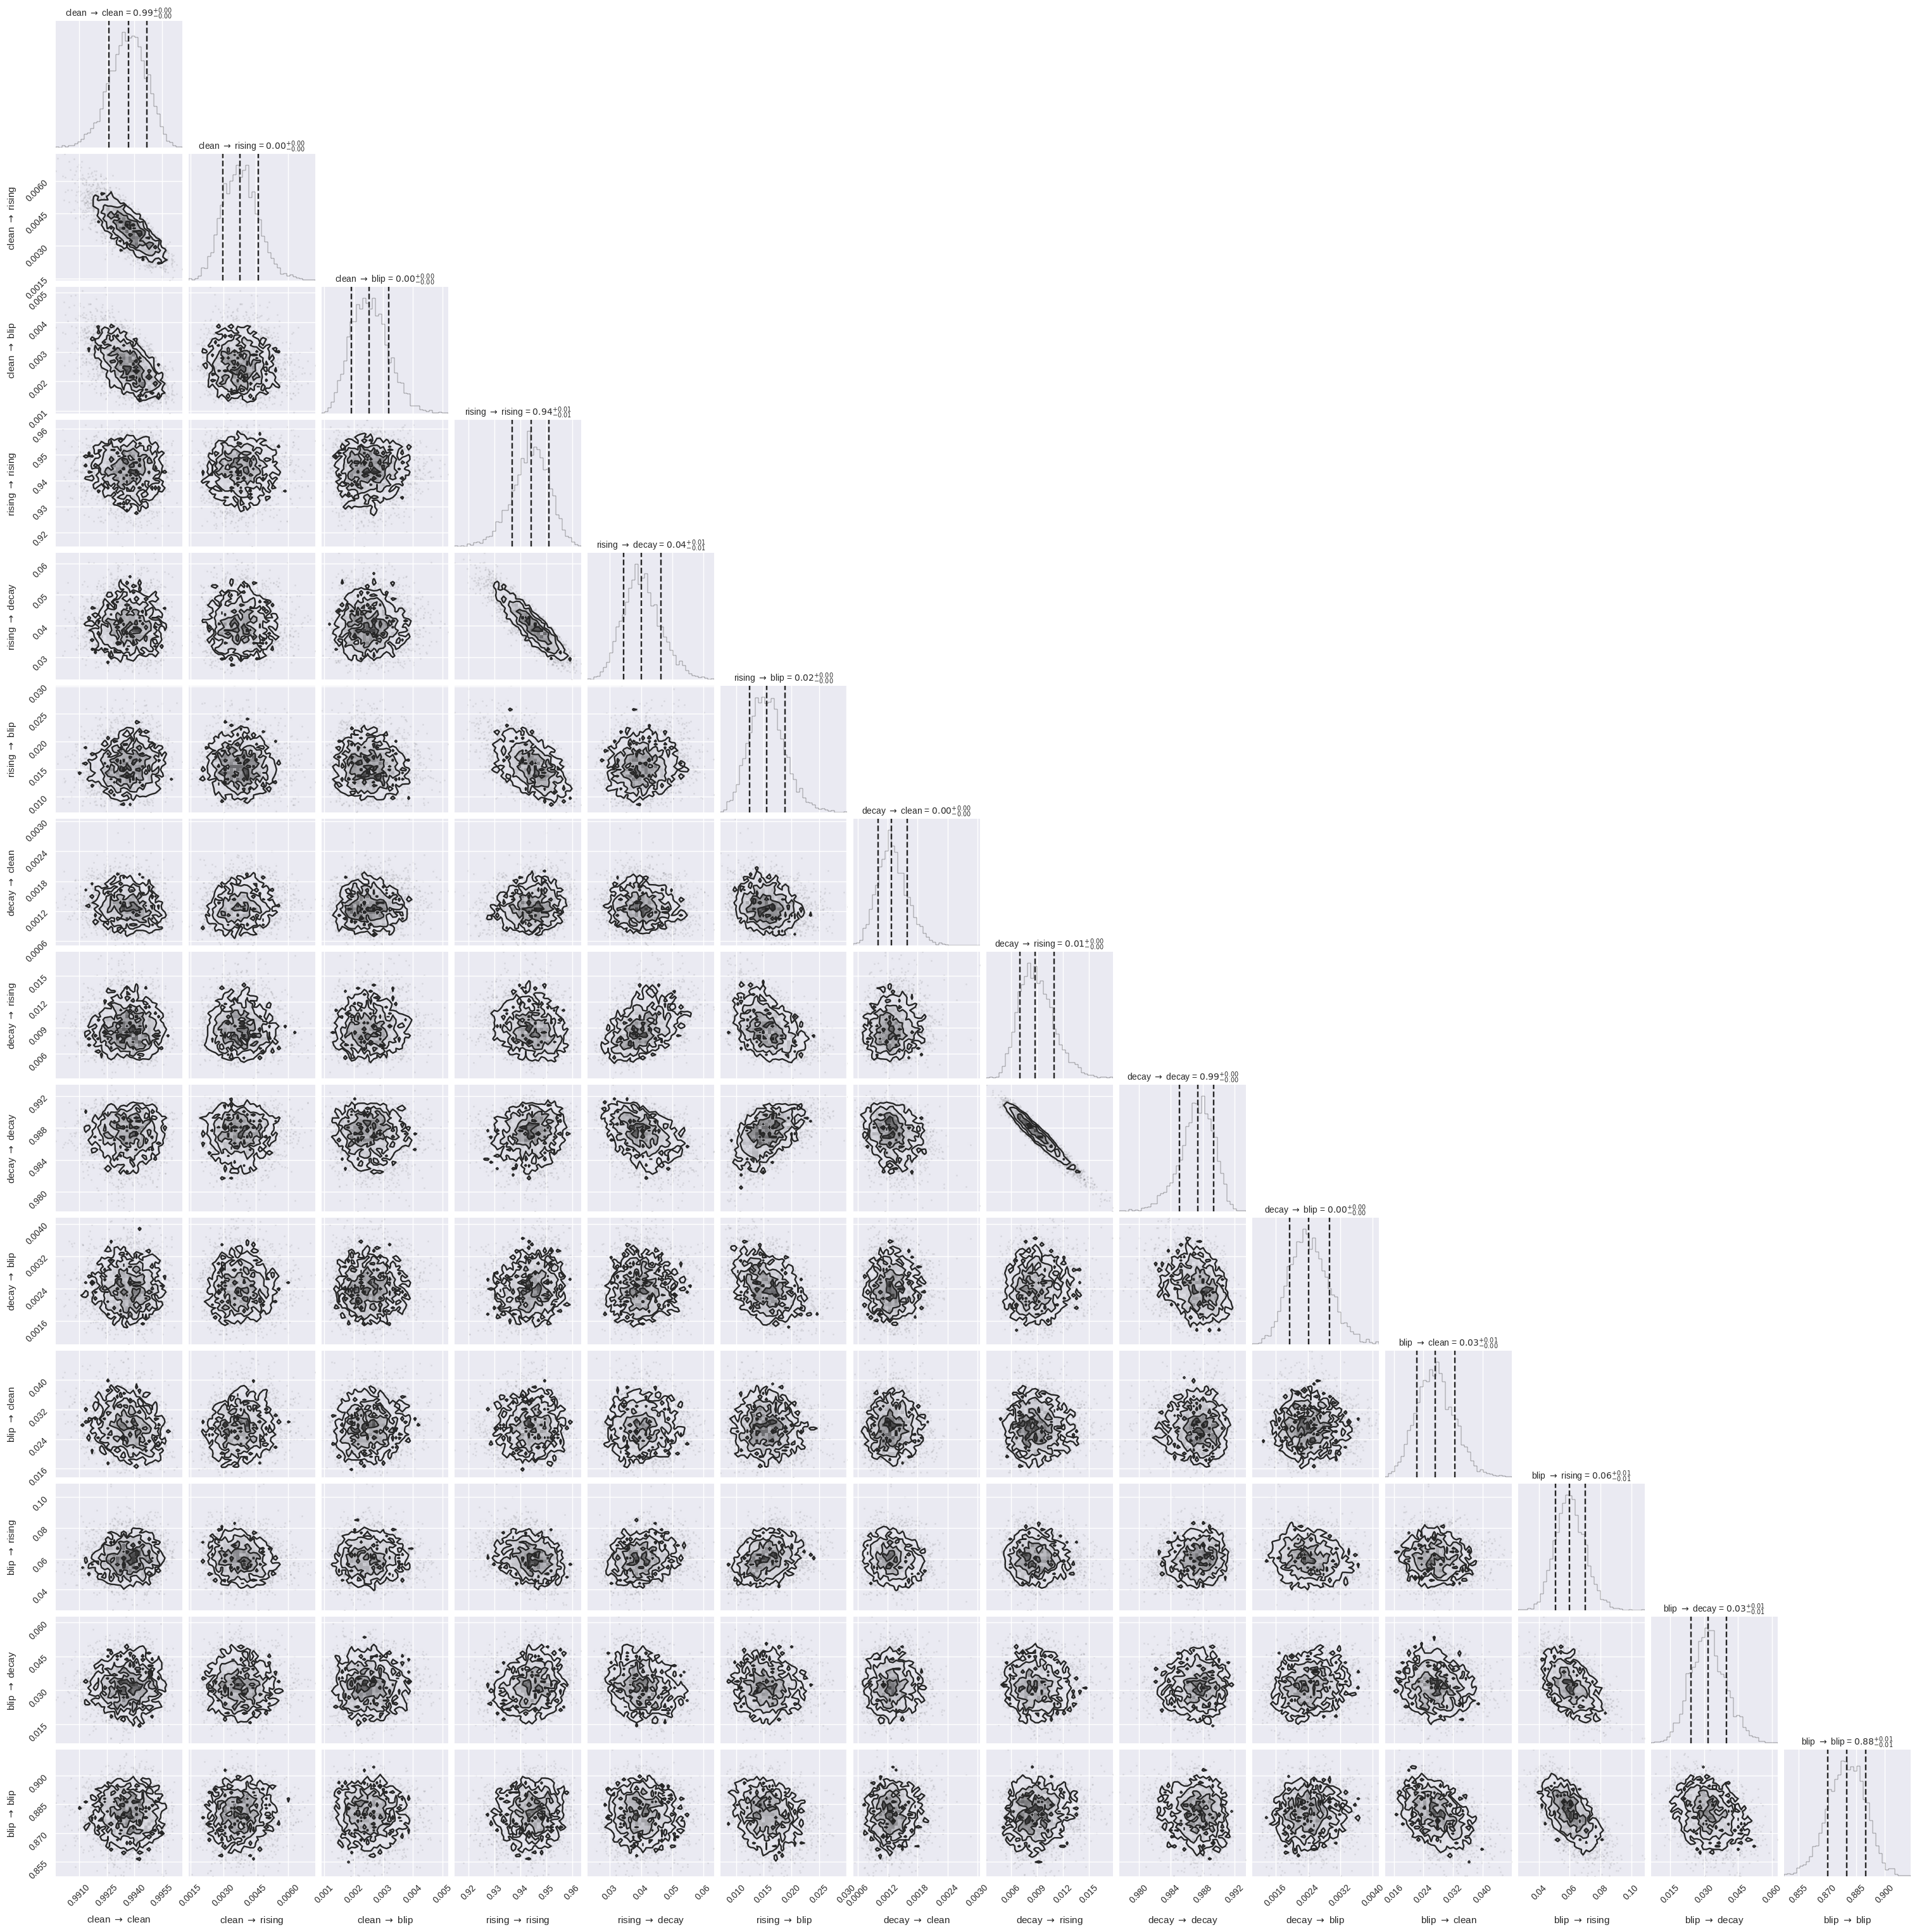

In [16]:
importlib.reload(ut)

ut.transition_corner_plot(hmm_fit, save_path=None)

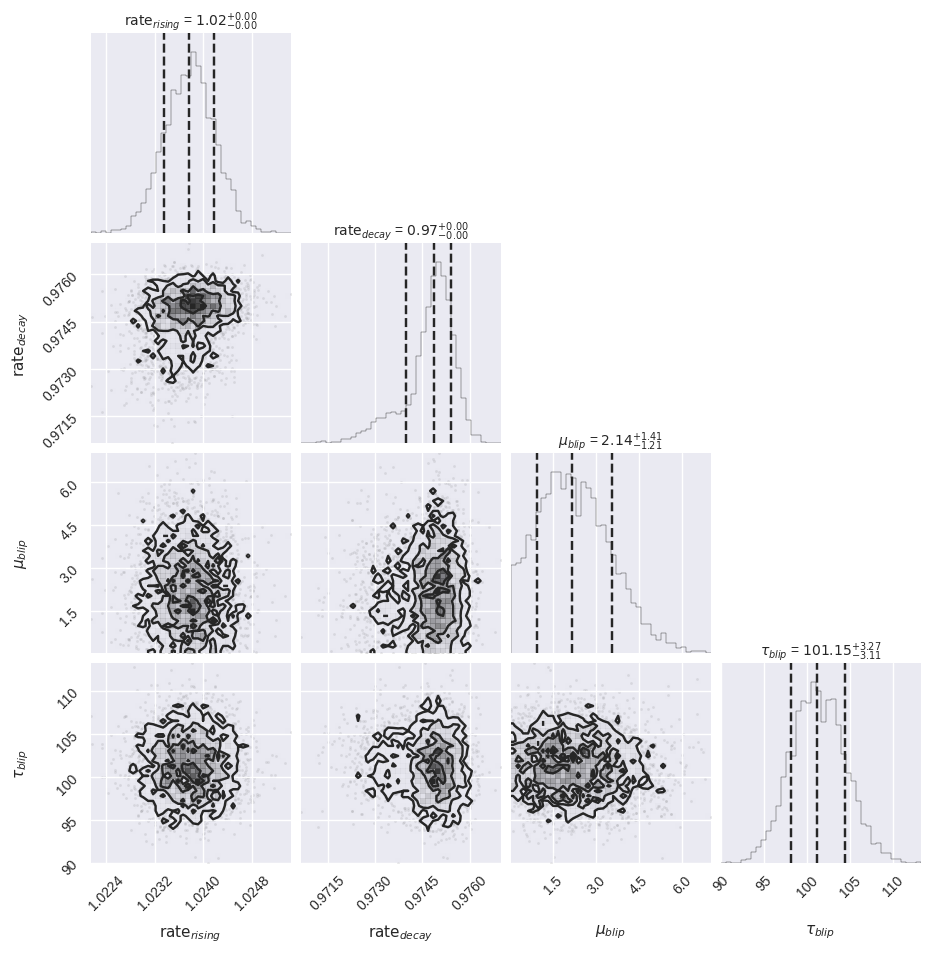

In [17]:
importlib.reload(ut)

ut.emission_corner_plot(hmm_fit, save_path=None)

In [25]:
# importlib.reload(ut)

# ut.plot_prediction_hist(hmm_dict, hmm_fit, save_path=None)